In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mth
import scipy as sy

# Flujo Diferencial

* número de muones (dN) en unidad de área (dS) por energía (dE) por ángulo sólido (dΩ) por unidad de tiempo (dt). Al nivel del mar.

 $$ \Phi = \frac{d^{4}N}{dS\ dE\ dt\ d\Omega} \left( \frac{1}{GeV\ cm^{2}\ seg\ sr} \right) $$

# Flujo de Muones 
* **REF**: [doi: 10.3389/fenrg.2021.750159] Eq. (2).
* **REF**: [rpp2020-rev-cosmic-rays, 30.3.1 Muons], Eq.(30.4), válido para $E_{\mu} > 100 GeV$, ángulo del cenit $\theta$ > 70.
* ### Modelo de Gaisser

$$ \Phi_{G}(E,\theta) = A_{G}\ E^{-\gamma} \left( \frac{1}{1+\frac{1.1\ E\ cos \theta}{\epsilon_{\pi}}} + \frac{B_{G}}{1 + \frac{1.1\ E\ cos \theta}{\epsilon_{\kappa}}} \right)$$


In [10]:
def GaisserFlux(muonEnergy, theta):
    Emu   = muonEnergy
    costh = mth.cos(theta)
    pion = 1./(1 + 1.1 * Emu * costh / 115);
    kaon = 0.054/(1 + 1.1 * Emu * costh/850);
    flux = 0.14 * pow(Emu, -2.7) * (pion + kaon);
    flux  = 0.14 * (pion + kaon);
    return flux 

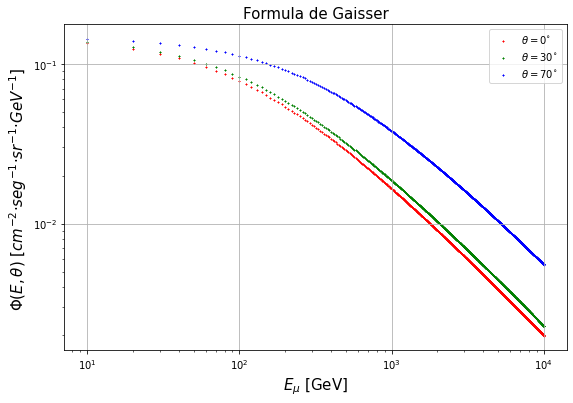

In [28]:
# datos del gráfico
Ex = np.linspace(1e1,1e4,1000)       # Eµ -> {1e1,1e4}
th1 = np.array([0,30,70])*mth.pi/180 # θ ->  {0,30,70}° grados 
flux1 = GaisserFlux(x,th1[0]) # flujo 1
flux2 = GaisserFlux(x,th1[1]) # flujo 2
flux3 = GaisserFlux(x,th1[2]) # flujo 3

fig, ax = plt.subplots(1,1)      # init fig.
fig.set_size_inches(9,6)      # tamaño fig.
ax.scatter(Ex,flux1,s=1,marker='x',color='r')  # flujo1
ax.scatter(Ex,flux2,s=1,marker='x',color='g')  # flujo2
ax.scatter(Ex,flux3,s=1,marker='x',color='b')  # flujo3
ax.loglog()                                    # xy loglog
#ax.set_ylim(y.min(),y.max())                  # límites y
ax.set_title("Formula de Gaisser",fontsize=15) # título
ax.set_xlabel(r"$E_{\mu}$ [GeV]", fontsize=15) # eje x
ax.set_ylabel(r"$\Phi(E,\theta) \ [cm^{-2}·seg^{-1}·sr^{-1}·GeV^{-1}]$ ",
              fontsize=15)                     # eje y
plt.grid()                                     # rejilla
plt.legend([r"$\theta=0^{\circ}$",             # leyenda
            r"$\theta=30^{\circ}$",
            r"$\theta=70^{\circ}$"])          
plt.show()

# Flujo Muones 2
* **REF**: [arXiv:1509.06176v1],-> Eq.(3).
* **REF**: [https://doi.org/10.3389/fenrg.2021.750159], -> Eq.(3).
* Parametrización modificada Gaisser, del flujo de muones al nivel del mar. Considerando la correción esférica de la tierra.
* Válido para flujo con E de 0.5 a 6000 GeV y para ángulos pequeños

In [2]:
def GaisserMod(muonEnergy, theta):
    p1 = 0.102573
    p2 = -0.068287
    p3 = 0.958633
    p4 = 0.0407253
    p5 = 0.817285
    
    costh = mth.cos(theta)
    costhStar2 = (costh**2 + p1**2 + p2*pow(costh,p3) + p4*pow(costh,p5))/(1+(p1**2)+p2+p4)
    costhStar  = mth.sqrt(costhStar2)
    Emu = muonEnergy # E -> GeV
    pion = 1/(1+1.1*Emu*costhStar/115)
    kaon = 0.054/(1+1.1*Emu*costhStar/850)
    flux = 0.14*pow(Emu*(1+3.64/(Emu*pow(costhStar,1.29))),-2.7)*(pion+kaon)
    
    return flux*10_000 # 1/cm^2 a 1/m^2

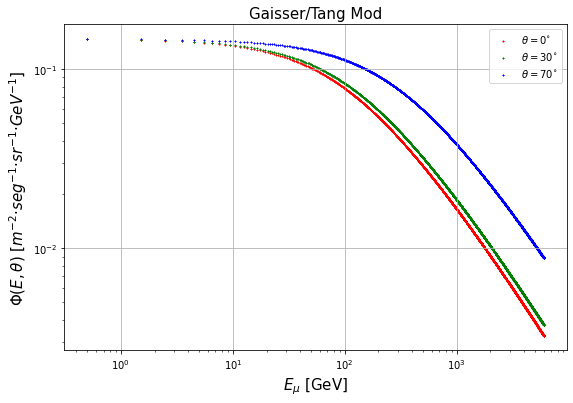

In [39]:
# datos del gráfico
Emu = np.arange(0.5,6e3,1)           # Eµ -> {1e1,1e4}
th2 = np.array([0,30,70])*mth.pi/180 # θ ->  {0,30,70}° grados 
flux1 = GaisserFlux(Emu,th2[0])        # flujo 1
flux2 = GaisserFlux(Emu,th2[1])        # flujo 2
flux3 = GaisserFlux(Emu,th2[2])        # flujo 3

fig, ax = plt.subplots()                       # init fig.
fig.set_size_inches(9,6)                       # tamaño
ax.scatter(Emu,flux1,s=1,marker='x',color='r') # flujo1
ax.scatter(Emu,flux2,s=1,marker='x',color='g') # flujo2
ax.scatter(Emu,flux3,s=1,marker='x',color='b') # flujo3
ax.loglog()                                    # xy loglog
#ax.set_xlim(1,1e4)                            # límites x
#ax.set_ylim(1e-3,3e2)                         # límites y
ax.set_title('Gaisser/Tang Mod',fontsize=15)   # título
ax.set_xlabel(r"$E_{\mu}$ [GeV]", fontsize=15) # eje x
ax.set_ylabel(r"$\Phi(E,\theta)\ [m^{-2}·seg^{-1}·sr^{-1}·GeV^{-1}]$ ",
             fontsize=15)                      # eje y
plt.grid()                                     # rejilla
plt.legend([r"$\theta=0^{\circ}$",             # leyenda
            r"$\theta=30^{\circ}$",
            r"$\theta=70^{\circ}$"])          
plt.show()

## Flujo de Muones del ángulo del cenit

In [24]:
Em = np.arange(1,6e3,1)           # energía
th = np.arange(0,10,1)*mth.pi/180 # ángulo °
fluxes = []                       # flujos
for angle in th:
    fluxes = sy.integrate.quadrature(GaisserMod(Em,angle), 
                                     1, 5e3, tol=0.001)
    #    fluxes = GaisserMod(Em,angle)

    
#th = np.arange(0,75,1)*mth.pi/180 
#VEC_GaisserMod = np.vectorize(GaisserMod,excluded=["theta"])

#flx1 = VEC_GaisserMod(Em,th)

TypeError: 'numpy.ndarray' object is not callable

## num randoms histograma flujo muones

* me quede en el histograma

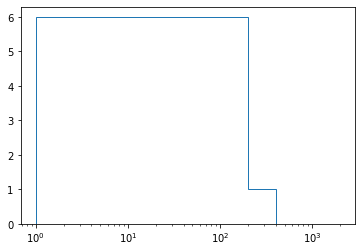

In [23]:
data =[213.974, 0.495535, 0.871293, 14.9578, 0.700293, 1.79243,17.1564,4.36564,2.14621,4.29187]
plt.hist(data,bins=10,range=[1,2000],histtype="step",stacked=True,log=False);
plt.xscale('log')
plt.show()

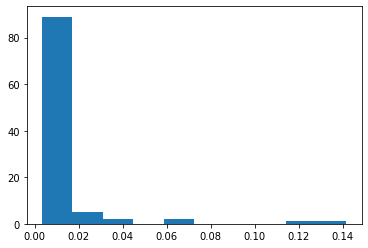

In [48]:
flux1 = GaisserFlux(Emu,th2[0])        # flujo 1
plt.hist(np.random.choice(flux1, 100));

In [49]:
np.random.choice(flux1, 100)

array([0.02263738, 0.01250604, 0.02891009, 0.00347266, 0.01001749,
       0.00473594, 0.00429518, 0.00365797, 0.00355114, 0.003823  ,
       0.00459612, 0.00578806, 0.00654419, 0.01043803, 0.01009276,
       0.02416584, 0.05179288, 0.00435012, 0.00346853, 0.00464532,
       0.00548108, 0.00363002, 0.0052319 , 0.05431247, 0.00351448,
       0.00683021, 0.00793339, 0.0230965 , 0.00743576, 0.00669734,
       0.01152099, 0.0036606 , 0.00918723, 0.00396633, 0.00974628,
       0.01195362, 0.00430152, 0.00364167, 0.00435198, 0.0404784 ,
       0.00487173, 0.00627162, 0.01839215, 0.03774615, 0.06325469,
       0.00346265, 0.0035892 , 0.014954  , 0.00891953, 0.00563894,
       0.00571653, 0.00611694, 0.00447021, 0.03359398, 0.01087831,
       0.00632429, 0.07599598, 0.00393044, 0.00622935, 0.0128351 ,
       0.03497655, 0.00979361, 0.00804365, 0.00542849, 0.01146177,
       0.08682309, 0.01143565, 0.00572457, 0.01976462, 0.02557978,
       0.00877243, 0.00789321, 0.00426288, 0.02877872, 0.00683

In [22]:
sy.integrate.quadrature(fluxes[0], 1, 5e3, tol=0.001)
                           
                           
                           

TypeError: 'numpy.float64' object is not callable

In [7]:
Em = np.arange(0.5,6e3,1)   # energía
th1 = 0*mth.pi/180        # grados -> rads, θ = 0°
th2 = 75*mth.pi/180       # grados -> rads, θ = 75°
flx1 = GaisserMod(Em,th1) # flujo θ = 0°
flx2 = GaisserMod(Em,th2)



sy.integrate.quadrature(GaisserMod(Em,th1), 1, 5e3, tol=0.001)




TypeError: 'numpy.ndarray' object is not callable

In [30]:
mth.cos(75*mth.pi/180)

0.25881904510252074